In [2]:
%matplotlib nbagg

In [27]:
from pathlib import Path
# root = Path('/home/klay6683/to_keep')
root = Path('/Users/klay6683/data/iuvs')
# df = pd.read_hdf('/home/klay6683/to_keep/l1a_dark_scan.h5', 'df')
df = pd.read_hdf(str(root / 'l1a_dark_scan.h5'), 'df')

## using previously defined clean up function

In [3]:
from iuvs import meta

/Users/klay6683/miniconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
df = meta.clean_up_dark_scan(df)

#### creating little checking function:

In [5]:
def check_values(col):
    return df[col.upper()].value_counts(dropna=False)

## filtering

Filtering out cruise and transition and integrations other than 14.4, 1.4, 4.2

In [6]:
df = df[df.COLLECTION_ID!='cruise']
df = df[df.COLLECTION_ID!='transition']
df = df[df.INT_TIME.isin([14400, 4200, 1400])]

### Pick time resolution for resampling

In [15]:
timeres = '5s'

## HK reading

In [16]:
hk = pd.read_hdf(str(root / 'HK_DB.h5'), 'df')

In [20]:
hktemps = hk.filter(regex='DET_TEMP_C').resample(timeres, fill_method='pad').dropna(how='all')

### Grouping by bin set

In [21]:
g = df.groupby(['CHANNEL', 'INT_TIME', 'activity', 'BINNING_SET'])

In [22]:
list_g = list(g)

In [23]:
list_g[0][1]

,ANC_SVN_REVISION,BIN_PATTERN_INDEX,BIN_TBL,CADENCE,CASE_TEMP,CHANNEL,CODE_SVN_REVISION,COLLECTION_ID,DET_TEMP,DUTY_CYCLE,...,ORBIT_NUMBER,PROCESS,PRODUCT_ID,SOLAR_LONGITUDE,TARGET_NAME,mean,median,std,BINNING_SET,activity
TIME_OF_INT,,,,,,,,,,,,,,,,,,,,,
2015-01-04 14:35:54.029920,1141,LINEAR linear_0007,"LINEAR 11,12 linear_0007",2,5.063534,FUV,1141,corona,-20.0608,1,...,516,2015/203 Jul 22 20:49:55.00000UTC,mvn_iuv_l1a_outbound-orbit00516-fuvdark_201501...,265.778046,MARS,1.086800,0.952391,0.808898,"(0, 3, 880, 3)",outbound
2015-01-04 14:35:56.029920,1141,LINEAR linear_0007,"LINEAR 11,12 linear_0007",2,5.063534,FUV,1141,corona,-20.2855,1,...,516,2015/203 Jul 22 20:49:55.00000UTC,mvn_iuv_l1a_outbound-orbit00516-fuvdark_201501...,265.778046,MARS,1.104852,1.031756,0.782640,"(0, 3, 880, 3)",outbound


In [26]:
testdf = list_g[0][1].resample(timeres)
testdf

,CADENCE,CASE_TEMP,DET_TEMP,DUTY_CYCLE,FOV_DEG,INT_TIME,LYA_CENTROID,MCP_VOLT,MIRROR_DEG,MIRROR_DN,...,NAXIS1,NAXIS2,NAXIS3,N_FILL,OBS_ID,ORBIT_NUMBER,SOLAR_LONGITUDE,mean,median,std
TIME_OF_INT,,,,,,,,,,,,,,,,,,,,,
2015-01-04 14:35:50,2,5.063534,-20.0608,1,84.693604,1400,1,-1.83,42.346802,28357,...,341,48,2,0,4103,516,265.778046,1.086800,0.952391,0.808898
2015-01-04 14:35:55,2,5.063534,-20.2855,1,84.693604,1400,1,-1.83,42.346802,28357,...,341,48,2,0,4103,516,265.778046,1.104852,1.031756,0.782640


In [25]:
hktemps['2015-01-04 14:35']

,FUV_DET_TEMP_C,MUV_DET_TEMP_C
2015-01-04 14:35:00,-19.461011,-20.634254
2015-01-04 14:35:05,-19.461011,-20.634254
2015-01-04 14:35:10,-19.461011,-20.634254
2015-01-04 14:35:15,-19.445859,-20.610976
2015-01-04 14:35:20,-19.445859,-20.610976
2015-01-04 14:35:25,-19.445859,-20.610976
2015-01-04 14:35:30,-19.445859,-20.610976
2015-01-04 14:35:35,-19.445859,-20.610976
2015-01-04 14:35:40,-19.445859,-20.610976
2015-01-04 14:35:45,-19.423139,-20.595464


In [55]:
for name, group in g:
    print(name, "Size:", len(group))

('FUV', 1400, 'outbound', (0, 3, 880, 3)) Size: 2
('FUV', 1400, 'outbound', (52, 4, 89, 115)) Size: 233
('FUV', 1400, 'outbound', (52, 8, 89, 115)) Size: 490
('FUV', 1400, 'outlimb', (0, 4, 89, 115)) Size: 4
('FUV', 1400, 'outlimb', (52, 4, 89, 115)) Size: 60
('FUV', 1400, 'outlimb', (52, 8, 89, 115)) Size: 360
('FUV', 4200, 'outboundhifi', (0, 1, 319, 11)) Size: 98
('FUV', 4200, 'outdiskhifi', (0, 1, 319, 11)) Size: 18
('FUV', 4200, 'periapse', (0, 1, 0, 1)) Size: 16
('FUV', 4200, 'periapse', (0, 4, 89, 115)) Size: 8484
('FUV', 4200, 'periapse', (1, 4, 89, 115)) Size: 355
('FUV', 4200, 'periapsehifi', (0, 1, 319, 11)) Size: 10
('FUV', 14400, 'apoapse', (0, 1, 0, 1)) Size: 14
('FUV', 14400, 'apoapse', (0, 4, 89, 80)) Size: 2372
('FUV', 14400, 'apoapse', (1, 4, 89, 80)) Size: 514
('FUV', 14400, 'apoapse', (52, 8, 89, 80)) Size: 5468
('FUV', 14400, 'apoapse', (65, 4, 89, 80)) Size: 100
('FUV', 14400, 'inbound', (0, 1, 0, 1)) Size: 4
('FUV', 14400, 'inbound', (0, 4, 89, 115)) Size: 6
('FU

In [44]:

muv1min = df[df.CHANNEL=='MUV'].resample('5s').dropna(how='all')
fuv1min = df[df.CHANNEL=='FUV'].resample('5s').dropna(how='all')

In [45]:
muv1min['HK_MUV_TEMP'] = hktemps.MUV_DET_TEMP_C
fuv1min['HK_FUV_TEMP'] = hktemps.FUV_DET_TEMP_C

In [57]:
for item in [muv1min, fuv1min]:
    item.loc[item['INT_TIME']<1.4, 'INT_TIME'] = 1.4

In [21]:
import seaborn as sns

/usr/local/python3/miniconda/lib/python3.4/site-packages/matplotlib-1.5.dev1-py3.4-linux-x86_64.egg/matplotlib/__init__.py:866: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [22]:
sns.set_style('whitegrid')
sns.set_context('talk')

In [54]:
df.INT_TIME.value_counts()

14.4    21710
4.2     17984
1.4      2300
Name: INT_TIME, dtype: int64

/usr/local/python3/miniconda/lib/python3.4/site-packages/matplotlib-1.5.dev1-py3.4-linux-x86_64.egg/matplotlib/__init__.py:886: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<IPython.core.display.Javascript object>


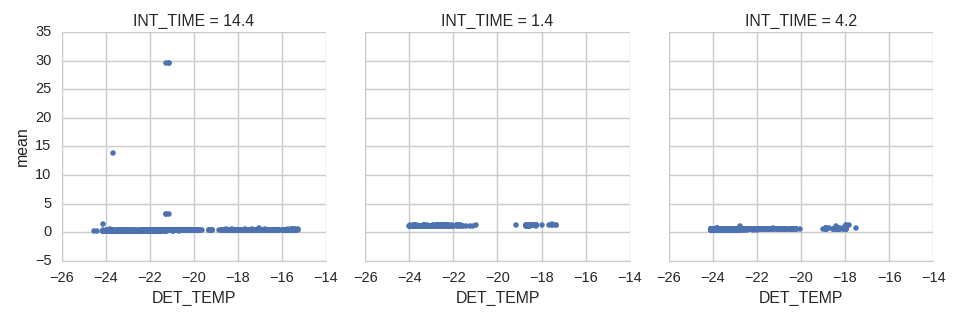

In [87]:
g = sns.FacetGrid(muv1min, col='INT_TIME', size=4)
g.map(plt.scatter, 'DET_TEMP', 'mean')

/usr/local/python3/miniconda/lib/python3.4/site-packages/matplotlib-1.5.dev1-py3.4-linux-x86_64.egg/matplotlib/__init__.py:886: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<IPython.core.display.Javascript object>


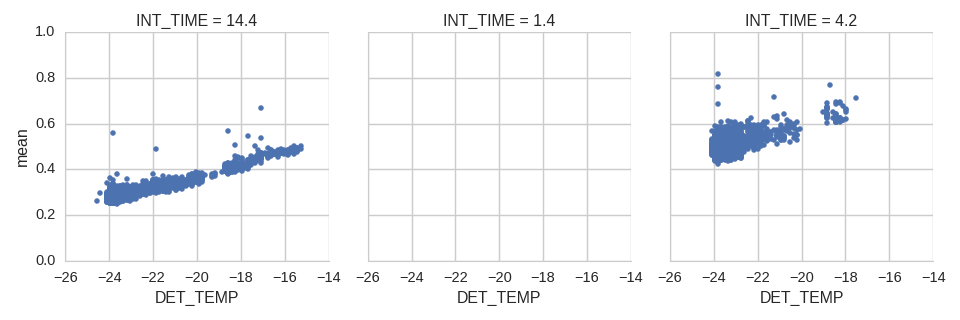

In [88]:
g = sns.FacetGrid(muv1min, col='INT_TIME', size=4, ylim=(0,1))
g.map(plt.scatter, 'DET_TEMP', 'mean')

/usr/local/python3/miniconda/lib/python3.4/site-packages/matplotlib-1.5.dev1-py3.4-linux-x86_64.egg/matplotlib/__init__.py:886: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<IPython.core.display.Javascript object>


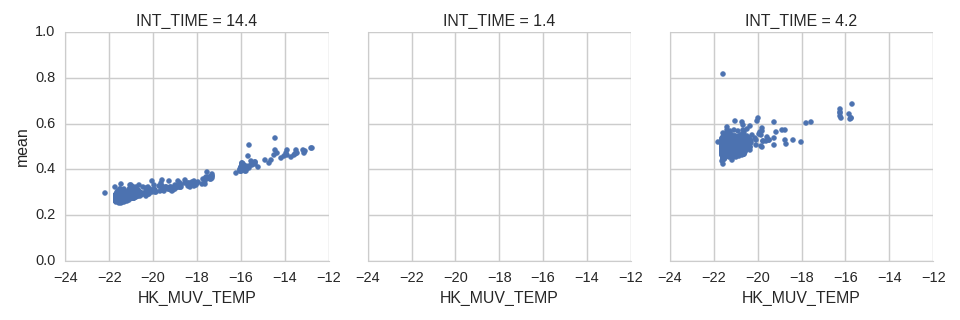

In [91]:
g = sns.FacetGrid(muv1min, col='INT_TIME', size=4, ylim=(0,1))
g.map(plt.scatter, 'HK_MUV_TEMP', 'mean')

In [94]:
g = sns.FacetGrid(muv1min, col='BINNING_SET', col_wrap=3 )
g.map(plt.scatter, 'HK_MUV_TEMP', 'mean')

/usr/local/python3/miniconda/lib/python3.4/site-packages/matplotlib-1.5.dev1-py3.4-linux-x86_64.egg/matplotlib/__init__.py:886: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


KeyError: 'BINNING_SET'

In [ ]:
g = sns.FacetGrid(df, col='CHANNEL')
g.map(plt.scatter, )

In [93]:
g?

In [ ]:
plt.figure()
sns.boxplot(x='COLLECTION_ID', y='mean', hue='CHANNEL', data=df)

In [ ]:
plt.figure()
sns.violinplot(x='COLLECTION_ID', y='median', hue='CHANNEL', data=df,
               split=True, cut=0)

In [ ]:
plt.figure()
sns.violinplot(x='COLLECTION_ID', y='median', data=df, hue='CHANNEL', inner=None,
               bw=.1, scale='count', scale_hue=False, cut=0)
sns.stripplot(x='COLLECTION_ID', y='median', data=df, jitter=True, size=3)

In [ ]:
plt.figure()
sns.barplot(x='COLLECTION_ID', y='mean', hue='CHANNEL', data=df)

In [ ]:
df = df[df.INT_TIME.isin([1.4, 4.2, 14.4])]

In [ ]:
df = df.sort_values(by='INT_TIME')

In [ ]:
plt.figure()
sns.pointplot(hue='COLLECTION_ID', y='mean', x='INT_TIME', data=df)

In [ ]:
%matplotlib inline

In [ ]:
df.columns

In [ ]:
to_drop = []
for col in df:
    n_unique = len(df[col].unique())
    if n_unique == 1:
        print(col)
        print(df[col].unique())
        to_drop.append(col)
df = df.drop(to_drop, axis=1)

In [ ]:
df.INT_TIME.value_counts()/df.INT_TIME.size

In [ ]:
sns.lmplot(x='DET_TEMP', y='median', hue='CHANNEL',
           col='INT_TIME', row='COLLECTION_ID', data=df, size=4)

In [ ]:
g = sns.FacetGrid(df, row='INT_TIME', hue='CHANNEL', size=1.7, aspect=4,)
g.map(sns.distplot, 'mean')

In [ ]:
df.BINNING_SET = df.BINNING_SET.astype('category')

In [ ]:
sns.jointplot(x='DET_TEMP',y='mean', data=df[(df.CHANNEL=='MUV') & (df.INT_TIME==14.4)])

In [ ]:
s = df.PRODUCT_ID.str.split('_')
s = s.map(lambda x: x[3]).str.split('-')
df['activity'] = s.map(lambda x: x[0])

In [ ]:
sns.lmplot(x='DET_TEMP', y='mean',hue='CHANNEL', data=df, aspect=1.33, size=8)

In [ ]:
ax = sns.lmplot(x='DET_TEMP', y='mean',hue='CHANNEL', data=df[df.INT_TIME==14.4],
           aspect=1.33, size=6)
plt.gcf().tight_layout()

In [ ]:
df.groupby(['INT_TIME','BINNING_SET']).size()

In [ ]:
df.columns

In [ ]:
sns.set()
sns.pairplot(df['channel case_temp det_temp int_time solar_longitude'.upper().split() + ['mean']].dropna(),
             hue='INT_TIME')

In [ ]:
df[df['mean']>1.0].COLLECTION_ID.value_counts()

In [ ]:
df.COLLECTION_ID.value_counts()

In [ ]:
sns.set_context('talk')

In [ ]:
plt.figure()
ax = sns.stripplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
              jitter=True)
ax.set_title("Dark mean vs INT_TIME")

In [ ]:
plt.figure()
ax = sns.boxplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                )
ax.set_title("Dark mean vs INT_TIME")

In [ ]:
plt.figure()
ax = sns.boxplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                )
ax.set_title("Dark mean vs INT_TIME")

In [ ]:
plt.figure()
ax = sns.violinplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                   split=True, cut=0, scale='area')
ax.set_title("Dark mean vs INT_TIME")

In [ ]:
sns.violinplot?

In [ ]:
plt.figure()
ax = sns.violinplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                   split=True, cut=0, scale='count')
sns.stripplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
              jitter=True, size=4)
ax.set_title("Dark mean vs INT_TIME")

In [ ]:
sns.violinplot?

In [ ]:
plt.figure()
sns.distplot(df.loc[(df.INT_TIME==4.2) & (df['mean']<1), 'mean'].dropna())

In [ ]:
df.INT_TIME.value_counts()

In [ ]:
df[df.INT_TIME==14.4]['mean'].dropna().size

In [ ]:
plt.figure()
ax = sns.violinplot(x='INT_TIME', y='std', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                   split=True, cut=0, scale='count', inner=None, bw=.2)
sns.stripplot(x='INT_TIME', y='std', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
              jitter=False, alpha=0.7, size=4)
ax.set_title("Dark STD vs INT_TIME")

In [ ]:
plt.figure()
sns.barplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'))

In [ ]:
plt.figure()
ax = sns.countplot(x='INT_TIME', data=df.sort_values(by='INT_TIME'), palette='Greens_d',
                  hue='CHANNEL')
ax.set_title('Counts of integrations per INT_TIME')

In [ ]:
df = df[df.INT_TIME.isin([1.4, 4.2, 14.4])]

In [ ]:
g = sns.PairGrid(df, x_vars=['INT_TIME'], hue='CHANNEL',
                y_vars=['mean','std'], size=3.5)
g.map(sns.violinplot)

## Compare with HK

In [ ]:
from iuvs import hk

In [ ]:
hkdb = pd.read_hdf('/home/klay6683/to_keep/HK_DB.h5', 'df')

In [ ]:
hkdb['2015'][['MUV_DET_TEMP_C']].resample('1min').plot()

In [ ]:
check_values('lya_centroid')

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.groupby(['CHANNEL', 'COLLECTION_ID','INT_TIME'])['median'].mean()

In [ ]:
%matplotlib nbagg

In [ ]:
df['mean'].max()

In [ ]:
df[df['mean']> 20].filter(regex='NAXIS.')

In [ ]:
df[df['mean']> 20].PRODUCT_ID.values

In [ ]:
plt.figure()
df['mean'].plot(kind='hist', bins=100, logy=True, xlim=(0,3))

In [ ]:
l1a = io.L1AReader('mvn_iuv_l1a_apoapse-orbit01597-muvdark_20150725T184050_v02_r01.fits.gz',
                   env='production')

In [ ]:
l1a

In [ ]:
l1a.img.shape

In [ ]:
l1a.img.mean()

In [ ]:
l1a.p 

In [ ]:
df.groupby(['activity','COLLECTION_ID'])['mean'].mean()

In [ ]:
cols_of_interest = df.columns.drop('anc_svn_revision  bin_tbl code_svn_revision obs_id'
                                   ' orbit_number process product_id'.upper().split())

In [ ]:
# df.CHANNEL = df.CHANNEL.map(lambda x: 0 if x=='MUV' else 1)

In [ ]:
df=df[cols_of_interest]
# df = df.select_dtypes(include=[float, int])
# df= df.drop('SW_VER NAXIS3'.split(), axis=1)

In [ ]:
df = df.dropna(how='any')

In [ ]:
df.to_hdf('/Users/klay6683/data/iuvs/dark_stuff/to_study.h5','df')

In [ ]:
df.head()

# Odd things

## Difference between MIRROR_DEG and MIR_DEG

In [ ]:
df['mirdeg_delta'] = df.MIRROR_DEG - df.MIR_DEG

In [ ]:
plt.figure()
df.mirdeg_delta.plot(style='.')